In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("white")

In [2]:
spx = pd.read_csv('../dataset/Assets/spx.csv', encoding='unicode_escape')
dxy = pd.read_csv ('../dataset/Indicators/dxy.csv', encoding='unicode_escape')
vix = pd.read_csv ('../dataset/Indicators/vix.csv', encoding='unicode_escape')
interest_rates = pd.read_csv('../dataset/Indicators/interest_rates.csv', encoding='unicode_escape')

### Cleaning and Reindexing

In [3]:
def cleaned_df(df): 
    df['time'] = df['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
    df['time'] = pd.to_datetime(df["time"])
    df.set_index('time', inplace=True)
    df= df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))
    df.interpolate(method='linear', inplace=True)
    df.index.names = ['Dates']
    df = df[(df.index >= '2000-01-01') & (df.index <= '2022-11-02')]
    return df

In [4]:
spx = cleaned_df(spx)
dxy = cleaned_df(dxy)
vix = cleaned_df(vix)
interest_rates = cleaned_df(interest_rates)

### Comparing the SP 500 price, DXY and VIX Visualization

In [5]:
def spx_dxy_vix():
    fig, (ax1, ax3) = plt.subplots(2, figsize = (12, 8))
    fig.suptitle('SPX vs DXY vs VIX', x=0.46, y=1, fontsize = 20)
    comment_txt = '''\
Dollar Index gains strength when interest rates rise, making the dollar more attractive for investors.\nHigher rates lead to risk aversion = less liquidity enters the market (lower prices).\nDXY and VIX = Negative correlation with the SP 500.\nVolatility spikes when the market falls violently.
    '''
    plt.figtext(0.15, -0.1, comment_txt)
    
    #color = 'tab:black'
    ax1.set_title('SP 500 vs DXY')
    ax1.set_xlabel('Years')
    ax1.set_ylabel('Price (USD)', color='black')
    ax1.plot(spx.index, spx.close, color='black', label = 'SP 500', linewidth=1.5, linestyle='solid')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.legend(bbox_to_anchor=(1.08, 1.05), loc = 'upper left')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Dollar Index Strength (DXY)', color = "blue")  
    ax2.plot(dxy.index, dxy.close, color="blue", label = 'DXY', linewidth=1, linestyle='dashdot')
    ax2.tick_params(axis='y', labelcolor = "blue")
    ax2.legend(bbox_to_anchor=(1.08, 0.9), loc = 'upper left')

    ax3.plot(spx.index, spx.close, color = "black", label = 'SP 500', linewidth=1.5, linestyle='solid')
    ax3.set_title('SP 500 vs VIX')
    ax3.set_xlabel('Years')
    ax3.set_ylabel('Price (USD)', color='black')
    ax3.legend(bbox_to_anchor=(1.08, 1.05), loc = 'upper left')

    ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis
    ax4.set_ylabel('Volatily Index (VIX)', color = "blue")  
    ax4.plot(vix.index, vix.close, color="blue", label = 'VIX', linewidth=1, linestyle='dashdot')
    ax4.tick_params(axis='y', labelcolor = "blue")
    ax4.legend(bbox_to_anchor=(1.08, 0.9), loc = 'upper left')


    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.style.use('seaborn-dark')
    print(plt.style.available)
    return plt.show()

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


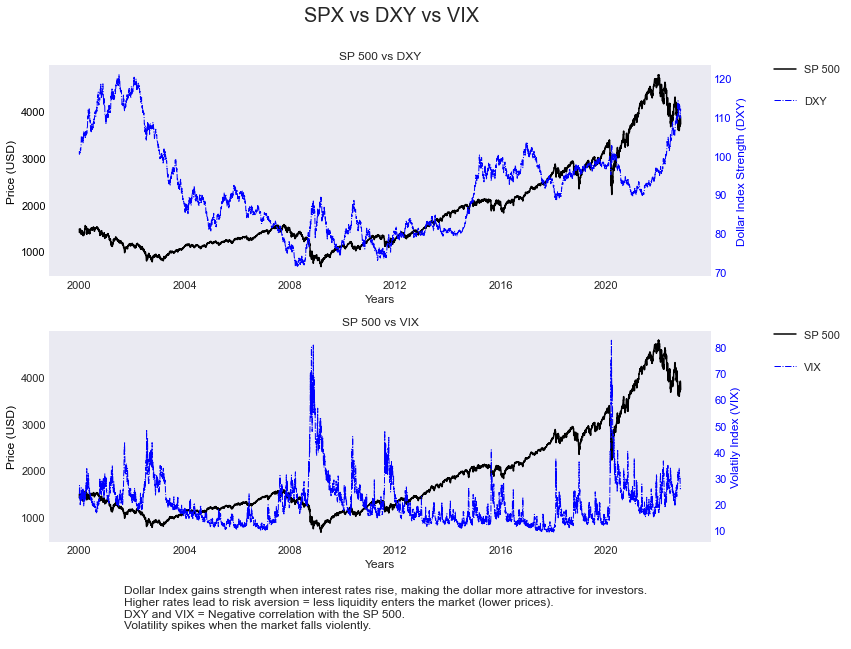

In [7]:
spx_dxy_vix()

### Comparing the SP 500 price, DXY, VIX and interest rates Visualization

In [8]:
def spx_dxy_vix_ir():
    fig, (ax1, ax3, ax5) = plt.subplots(3, figsize = (14, 10))
    fig.suptitle('Comparison between SPX vs DXY vs VIX vs Interest Rates', x=0.46, y=1, fontsize = 20)
    comment_txt = '''\
Dollar Index usually gains strength when interest rates rise, making the dollar more attractive for investors.\nHigher rates lead to risk aversion = less liquidity enters the market (lower prices).\nDXY and VIX = Negative correlation with the SP 500.\nVolatility spikes when the market falls violently.
    '''
    plt.figtext(0.15, -0.1, comment_txt)
    
    #color = 'tab:black'
    ax1.set_title('SP 500 vs DXY')
    ax1.set_xlabel('Years')
    ax1.set_ylabel('Price (USD)', color='black')
    ax1.plot(spx.index, spx.close, color='black', label = 'SP 500', linewidth=1.5, linestyle='solid')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.legend(bbox_to_anchor=(1.08, 1.05), loc = 'upper left')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Dollar Index Strength (DXY)', color = "blue")  
    ax2.plot(dxy.index, dxy.close, color="blue", label = 'DXY', linewidth=1, linestyle='dashdot')
    ax2.tick_params(axis='y', labelcolor = "blue")
    ax2.legend(bbox_to_anchor=(1.08, 0.9), loc = 'upper left')

    ax3.plot(spx.index, spx.close, color = "black", label = 'SP 500', linewidth=1.5, linestyle='solid')
    ax3.set_title('SP 500 vs VIX')
    ax3.set_xlabel('Years')
    ax3.set_ylabel('Price (USD)', color='black')
    ax3.legend(bbox_to_anchor=(1.08, 1.05), loc = 'upper left')

    ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis
    ax4.set_ylabel('Volatily Index (VIX)', color = "blue")  
    ax4.plot(vix.index, vix.close, color="blue", label = 'VIX', linewidth=1, linestyle='dashdot')
    ax4.tick_params(axis='y', labelcolor = "blue")
    ax4.legend(bbox_to_anchor=(1.08, 0.9), loc = 'upper left')

    ax5.plot(interest_rates.index, interest_rates.close, color = "black", label = 'Interest Rates', linewidth=2, linestyle='solid')
    ax5.set_title('Interest Rates vs DXY')
    ax5.set_xlabel('Years')
    ax5.set_ylabel('Interest Rate (%)', color='black')
    ax5.legend(bbox_to_anchor=(1.08, 1.05), loc = 'upper left')

    ax6 = ax5.twinx() 
    ax6.set_ylabel('Dollar Index Strength (DXY)', color='blue')  
    ax6.plot(dxy.index, dxy.close, color='blue', label = 'DXY', linewidth=2, linestyle='dashdot')    
    ax6.tick_params(axis='y', labelcolor = "blue")
    ax6.legend(bbox_to_anchor=(1.08, 0.9), loc = 'upper left')

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.style.use('seaborn-dark')
    print(plt.style.available)
    return plt.show()

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


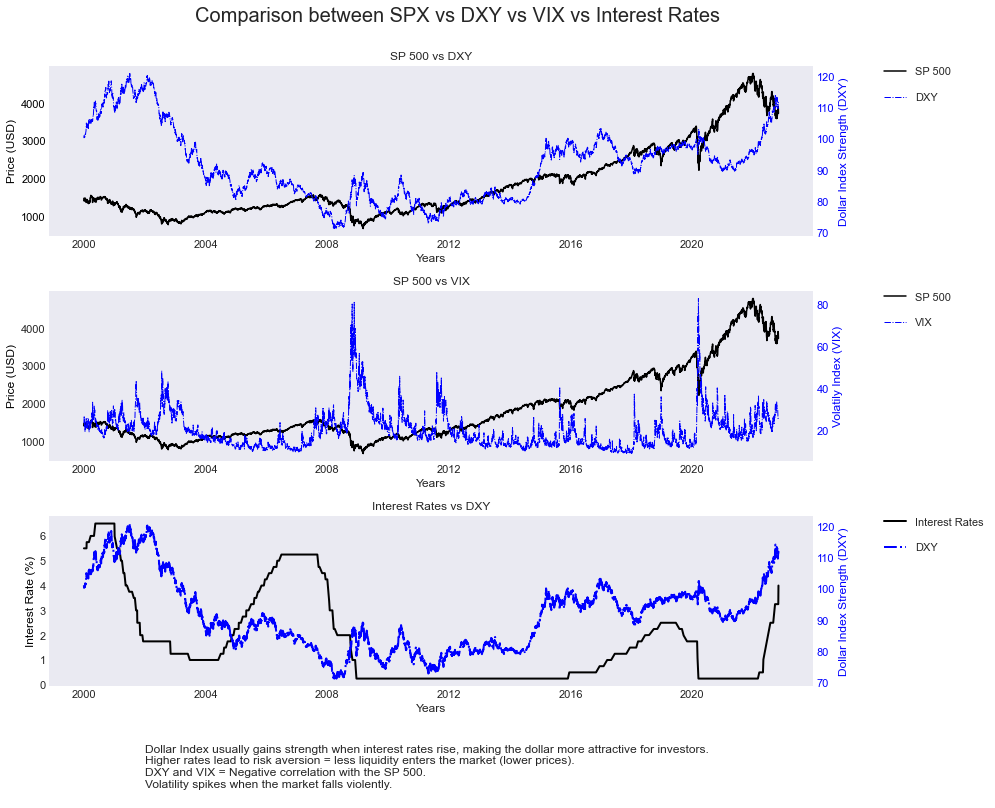

In [10]:
spx_dxy_vix_ir()